<h2 align='center'>Principal Component Analysis</h2>


# Principal Component Analysis - Heart Disease Prediction

## Business/Research Problem
Heart disease is a leading cause of death worldwide. Early detection using machine learning can help in preventive healthcare.

## Objectives
1. Perform data preprocessing and exploratory data analysis
2. Apply PCA for dimensionality reduction
3. Compare model performance with and without PCA
5. Visualize high-dimensional data in 2D space

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
df= pd.read_csv("data/heart.csv")

In [3]:
df2= pd.read_csv("data/heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df2.shape

(918, 12)

In [6]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [7]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [8]:
ChestPainType_dummies=pd.get_dummies(df["ChestPainType"])

In [9]:
ChestPainType_dummies

,ASY,ATA,NAP,TA
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
913,False,False,False,True
914,True,False,False,False
915,True,False,False,False
916,False,True,False,False


In [10]:
RestingECG_dummies=pd.get_dummies(df['RestingECG'])

In [11]:
RestingECG_dummies

,LVH,Normal,ST
0,False,True,False
1,False,True,False
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
913,False,True,False
914,False,True,False
915,False,True,False
916,True,False,False


In [12]:
ChestPainType_dummies=ChestPainType_dummies.drop('TA', axis='columns')

In [13]:
RestingECG_dummies=RestingECG_dummies.drop('ST', axis='columns')

In [14]:
df = pd.concat([df,ChestPainType_dummies,RestingECG_dummies],axis='columns')

In [15]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,LVH,Normal
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,False,True,False,False,True
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,False,False,True,False,True
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,False,True,False,False,False
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,True,False,False,False,True
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,False,False,True,False,True


In [16]:
df=df.drop('ChestPainType', axis='columns')
df=df.drop('RestingECG', axis='columns')

In [17]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,LVH,Normal
0,40,M,140,289,0,172,N,0.0,Up,0,False,True,False,False,True
1,49,F,160,180,0,156,N,1.0,Flat,1,False,False,True,False,True
2,37,M,130,283,0,98,N,0.0,Up,0,False,True,False,False,False
3,48,F,138,214,0,108,Y,1.5,Flat,1,True,False,False,False,True
4,54,M,150,195,0,122,N,0.0,Up,0,False,False,True,False,True


In [18]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

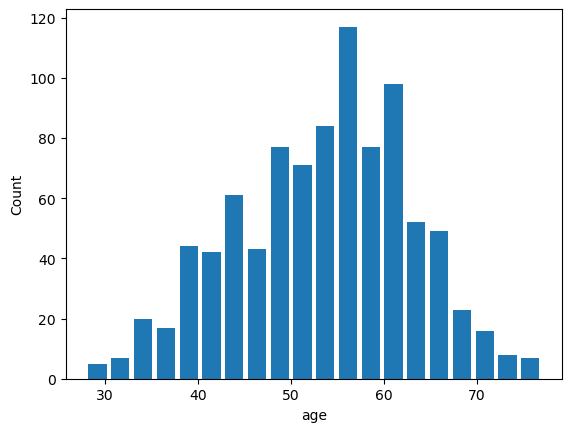

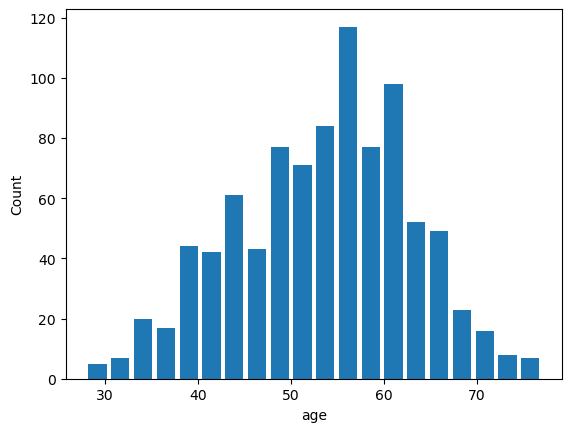

In [19]:
plt.hist(df.Age, bins=20, rwidth=0.8)
plt.xlabel('age')
plt.ylabel('Count')
plt.show()
df['zscore_Age'] = ( df.Age - df.Age.mean() ) / df.Age.std()
df=df[(df.zscore_Age>-3) & (df.zscore_Age<3)]
plt.hist(df.Age, bins=20, rwidth=0.8)
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

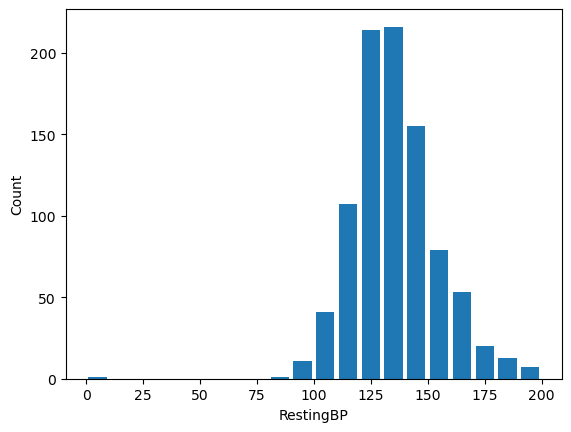

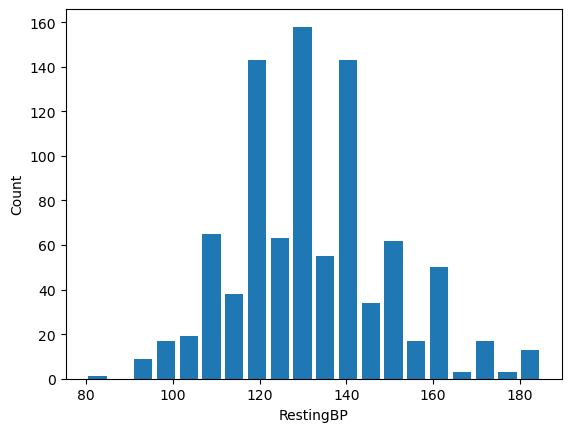

In [20]:
plt.hist(df.RestingBP, bins=20, rwidth=0.8)
plt.xlabel('RestingBP')
plt.ylabel('Count')
plt.show()
df['zscore_RestingBP'] = ( df.RestingBP - df.RestingBP.mean() ) / df.RestingBP.std()
df=df[(df.zscore_RestingBP>-3) & (df.zscore_RestingBP<3)]
plt.hist(df.RestingBP, bins=20, rwidth=0.8)
plt.xlabel('RestingBP')
plt.ylabel('Count')
plt.show()

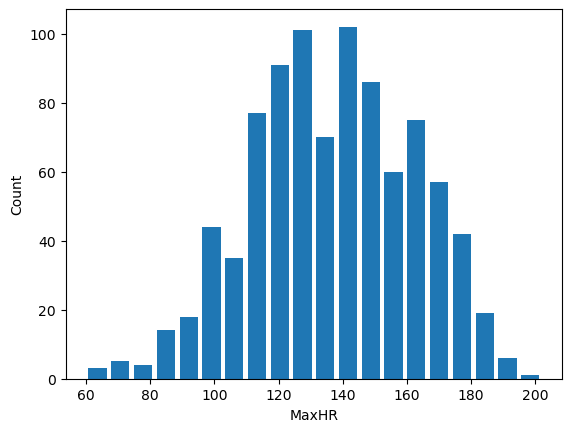

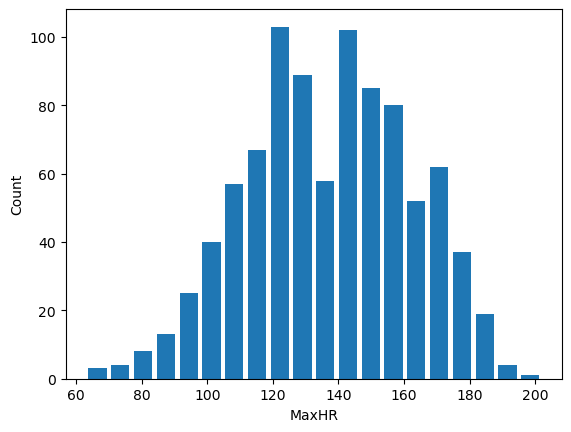

In [21]:
plt.hist(df.MaxHR, bins=20, rwidth=0.8)
plt.xlabel('MaxHR')
plt.ylabel('Count')
plt.show()
df['zscore_MaxHR'] = ( df.MaxHR - df.MaxHR.mean() ) / df.MaxHR.std()
df=df[(df.zscore_MaxHR>-3) & (df.zscore_MaxHR<3)]
plt.hist(df.MaxHR, bins=20, rwidth=0.8)
plt.xlabel('MaxHR')
plt.ylabel('Count')
plt.show()

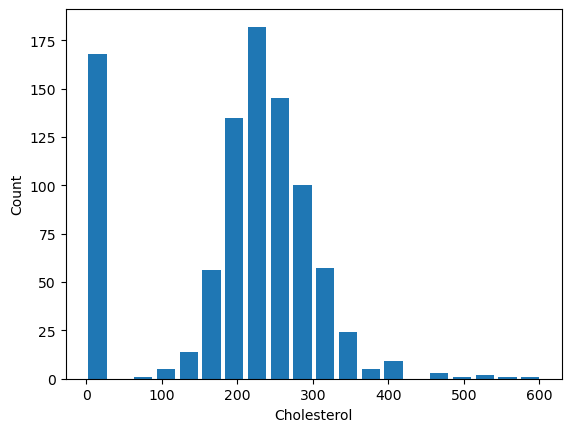

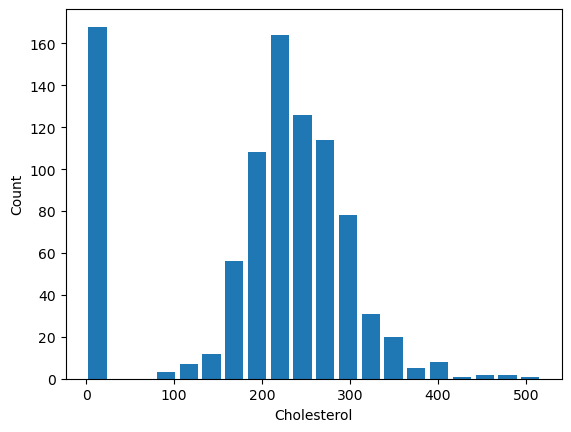

In [22]:
plt.hist(df.Cholesterol, bins=20, rwidth=0.8)
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()
df['zscore_Cholesterol'] = ( df.Cholesterol - df.Cholesterol.mean() ) / df.Cholesterol.std()
df=df[(df.zscore_Cholesterol>-3) & (df.zscore_Cholesterol<3)]
plt.hist(df.Cholesterol, bins=20, rwidth=0.8)
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

In [23]:
df.shape

(906, 19)

In [24]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,LVH,Normal,zscore_Age,zscore_RestingBP,zscore_MaxHR,zscore_Cholesterol
0,40,M,140,289,0,172,N,0.0,Up,0,False,True,False,False,True,-1.432359,0.410685,1.386941,0.822525
1,49,F,160,180,0,156,N,1.0,Flat,1,False,False,True,False,True,-0.478223,1.490940,0.756277,-0.177433
2,37,M,130,283,0,98,N,0.0,Up,0,False,True,False,False,False,-1.750404,-0.129442,-1.529880,0.767481
3,48,F,138,214,0,108,Y,1.5,Flat,1,True,False,False,False,True,-0.584238,0.302660,-1.135715,0.134480
4,54,M,150,195,0,122,N,0.0,Up,0,False,False,True,False,True,0.051853,0.950812,-0.583884,-0.039824


In [25]:
df['FastingBS'].unique()

array([0, 1])

In [26]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [27]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [28]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [29]:
ST_Slope_dummies=pd.get_dummies(df['ST_Slope'])
ST_Slope_dummies=ST_Slope_dummies.drop('Down', axis='columns')

In [30]:
ExerciseAngina_dummies=pd.get_dummies(df['ExerciseAngina'])
ExerciseAngina_dummies=ExerciseAngina_dummies.drop('Y', axis='columns')

In [31]:
Sex_dummies=pd.get_dummies(df['Sex'])
Sex_dummies=Sex_dummies.drop('F', axis='columns')

In [32]:
df = pd.concat([df,ST_Slope_dummies,ExerciseAngina_dummies,Sex_dummies],axis='columns')
df=df.drop('ST_Slope', axis='columns')
df=df.drop('ExerciseAngina', axis='columns')
df=df.drop('Sex', axis='columns')

In [33]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,LVH,Normal,zscore_Age,zscore_RestingBP,zscore_MaxHR,zscore_Cholesterol,Flat,Up,N,M
0,40,140,289,0,172,0.0,0,False,True,False,False,True,-1.432359,0.410685,1.386941,0.822525,False,True,True,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,-0.478223,1.490940,0.756277,-0.177433,True,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,False,False,-1.750404,-0.129442,-1.529880,0.767481,False,True,True,True
3,48,138,214,0,108,1.5,1,True,False,False,False,True,-0.584238,0.302660,-1.135715,0.134480,True,False,False,False
4,54,150,195,0,122,0.0,0,False,False,True,False,True,0.051853,0.950812,-0.583884,-0.039824,False,True,True,True


In [34]:
df["ASY"] = df["ASY"].astype(int)
df["ATA"] = df["ATA"].astype(int)
df["NAP"] = df["NAP"].astype(int)
df["LVH"] = df["LVH"].astype(int)
df["Normal"] = df["Normal"].astype(int)
df["Flat"] = df["Flat"].astype(int)
df["Up"] = df["Up"].astype(int)
df["N"] = df["N"].astype(int)
df["M"] = df["M"].astype(int)

In [35]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,LVH,Normal,zscore_Age,zscore_RestingBP,zscore_MaxHR,zscore_Cholesterol,Flat,Up,N,M
0,40,140,289,0,172,0.0,0,0,1,0,0,1,-1.432359,0.410685,1.386941,0.822525,0,1,1,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,-0.478223,1.490940,0.756277,-0.177433,1,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,0,0,-1.750404,-0.129442,-1.529880,0.767481,0,1,1,1
3,48,138,214,0,108,1.5,1,1,0,0,0,1,-0.584238,0.302660,-1.135715,0.134480,1,0,0,0
4,54,150,195,0,122,0.0,0,0,0,1,0,1,0.051853,0.950812,-0.583884,-0.039824,0,1,1,1


In [36]:
df=df.drop(["zscore_Age" ,"zscore_RestingBP","zscore_MaxHR","zscore_Cholesterol"],axis='columns')

In [37]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,LVH,Normal,Flat,Up,N,M
0,40,140,289,0,172,0.0,0,0,1,0,0,1,0,1,1,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,1,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,1
3,48,138,214,0,108,1.5,1,1,0,0,0,1,1,0,0,0
4,54,150,195,0,122,0.0,0,0,0,1,0,1,0,1,1,1


In [38]:
correlation_matrix = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].corr()

In [39]:
correlation_matrix2 = df.corr()

In [40]:
import seaborn as sns

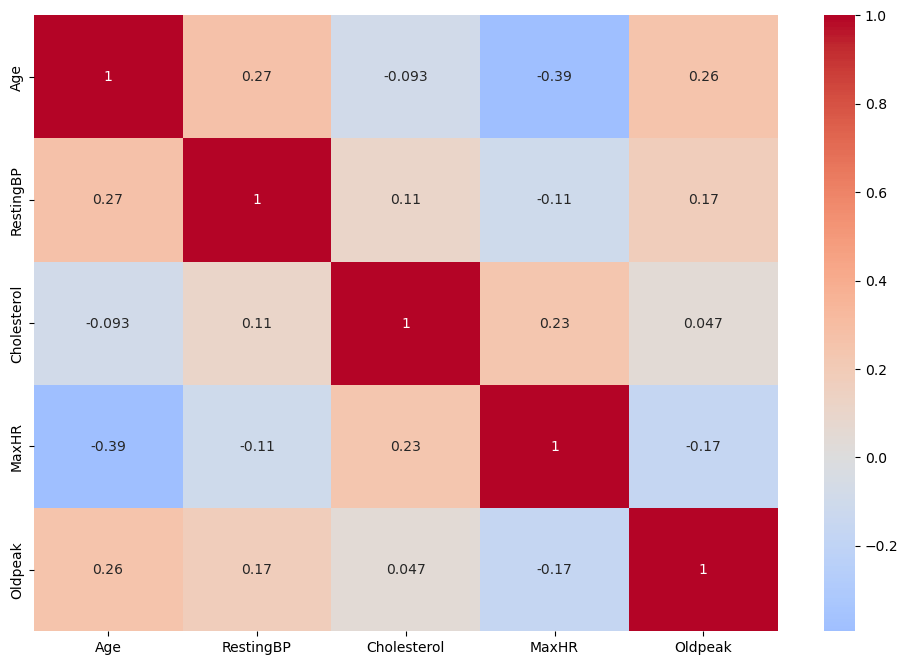

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

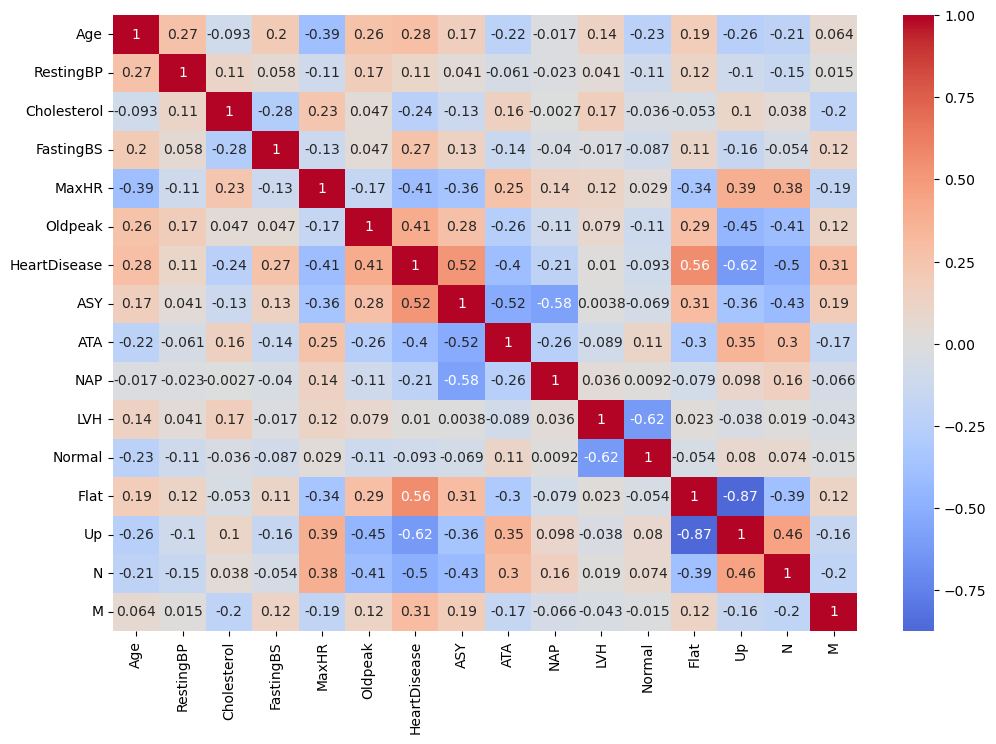

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', center=0)
plt.show()

In [43]:
X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

In [44]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['FastingBS', 'ASY', 'ATA', 'NAP', 'LVH', 'Normal', 'Flat', 'Up', 'N', 'M']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [48]:
# Scale only numerical features
scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train[numerical_features])

In [49]:
# Combine back with categorical features
X_train_scaled = np.concatenate([X_train_numerical_scaled, X_train[categorical_features]], axis=1)

In [50]:
X_train_scaled

array([[ 1.32560416,  0.43041365, -0.59021348, ...,  0.        ,
         0.        ,  1.        ],
       [-1.7265271 , -0.13958723,  0.09628156, ...,  1.        ,
         1.        ,  0.        ],
       [-0.04259261,  0.54441382,  0.23930136, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.1678992 , -0.02558706,  1.45020235, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25308442, -0.25358741, -1.91553031, ...,  0.        ,
         0.        ,  1.        ],
       [-1.41078938, -0.70958811,  2.52761818, ...,  0.        ,
         0.        ,  1.        ]])

In [51]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
svm_model = SVC(random_state=42)
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [53]:
X_test_numerical_scaled = scaler.transform(X_test[numerical_features])
X_test_scaled = np.concatenate([X_test_numerical_scaled, X_test[categorical_features]], axis=1)

In [54]:
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [55]:
logreg_model.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [56]:
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [57]:
print("Model Performance Comparison:")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Model Performance Comparison:
SVM Accuracy: 0.8956
Logistic Regression Accuracy: 0.8901
Random Forest Accuracy: 0.8626


In [58]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("=" * 60)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87        72
           1       0.91      0.92      0.91       110

    accuracy                           0.90       182
   macro avg       0.89      0.89      0.89       182
weighted avg       0.90      0.90      0.90       182



In [59]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("=" * 60)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        72
           1       0.94      0.87      0.91       110

    accuracy                           0.89       182
   macro avg       0.88      0.89      0.89       182
weighted avg       0.90      0.89      0.89       182



In [60]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        72
           1       0.91      0.85      0.88       110

    accuracy                           0.86       182
   macro avg       0.86      0.86      0.86       182
weighted avg       0.87      0.86      0.86       182



In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [63]:
print(X_train_pca.shape)

(724, 11)


In [64]:
print(X_test_pca.shape)

(182, 11)


In [65]:
print(pca.n_components_ )
print(pca.explained_variance_ratio_)

11
[0.28475022 0.17243768 0.12435359 0.10256672 0.08654113 0.04836051
 0.04063728 0.03874519 0.02541863 0.02182061 0.02107657]


In [66]:
X.shape

(906, 15)

In [67]:
svm_model.fit(X_train_pca, y_train)
y_pred_svm_pca = svm_model.predict(X_test_pca)
print("SVM Classification Report (PCA):")
print(classification_report(y_test, y_pred_svm_pca))
print("=" * 60)

SVM Classification Report (PCA):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        72
           1       0.92      0.92      0.92       110

    accuracy                           0.90       182
   macro avg       0.90      0.90      0.90       182
weighted avg       0.90      0.90      0.90       182



In [68]:
logreg_model.fit(X_train_pca, y_train)
y_pred_logreg_pca = logreg_model.predict(X_test_pca)
print("Logistic Regression Classification Report (PCA):")
print(classification_report(y_test, y_pred_logreg_pca))
print("=" * 60)


Logistic Regression Classification Report (PCA):
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        72
           1       0.93      0.85      0.89       110

    accuracy                           0.87       182
   macro avg       0.87      0.88      0.87       182
weighted avg       0.88      0.87      0.87       182



In [69]:
rf_model.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_model.predict(X_test_pca)
print("Random Forest Classification Report (PCA):")
print(classification_report(y_test, y_pred_rf_pca))

Random Forest Classification Report (PCA):
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        72
           1       0.92      0.86      0.89       110

    accuracy                           0.87       182
   macro avg       0.87      0.88      0.87       182
weighted avg       0.88      0.87      0.87       182



In [70]:
pca_n = PCA(n_components=8)
X_train_pca_n = pca_n.fit_transform(X_train_scaled)
X_test_pca_n = pca_n.transform(X_test_scaled)

In [71]:
svm_model.fit(X_train_pca_n, y_train)
y_pred_svm_pca = svm_model.predict(X_test_pca_n)
print("SVM Classification Report (PCA):")
print(classification_report(y_test, y_pred_svm_pca))
print("=" * 60)

SVM Classification Report (PCA):
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        72
           1       0.91      0.89      0.90       110

    accuracy                           0.88       182
   macro avg       0.87      0.88      0.87       182
weighted avg       0.88      0.88      0.88       182



In [72]:
logreg_model.fit(X_train_pca_n, y_train)
y_pred_logreg_pca = logreg_model.predict(X_test_pca_n)
print("Logistic Regression Classification Report (PCA):")
print(classification_report(y_test, y_pred_logreg_pca))
print("=" * 60)

Logistic Regression Classification Report (PCA):
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        72
           1       0.93      0.85      0.89       110

    accuracy                           0.87       182
   macro avg       0.87      0.88      0.87       182
weighted avg       0.88      0.87      0.87       182



In [73]:
rf_model.fit(X_train_pca_n, y_train)
y_pred_rf_pca = rf_model.predict(X_test_pca_n)
print("Random Forest Classification Report (PCA):")
print(classification_report(y_test, y_pred_rf_pca))

Random Forest Classification Report (PCA):
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        72
           1       0.90      0.88      0.89       110

    accuracy                           0.87       182
   macro avg       0.86      0.86      0.86       182
weighted avg       0.87      0.87      0.87       182



In [74]:
print("Accuracy Comparison for n_components from 1 to 15:")
print("n_components | SVM       | Logistic  | Random Forest")
print("-" * 50)

for n_comp in range(1, 16):
    # Apply PCA with n_components
    pca_n = PCA(n_components=n_comp)
    X_train_pca_n = pca_n.fit_transform(X_train_scaled)
    X_test_pca_n = pca_n.transform(X_test_scaled)
    
    # Train and evaluate models
    svm_accuracy = accuracy_score(y_test, svm_model.fit(X_train_pca_n, y_train).predict(X_test_pca_n))
    logreg_accuracy = accuracy_score(y_test, logreg_model.fit(X_train_pca_n, y_train).predict(X_test_pca_n))
    rf_accuracy = accuracy_score(y_test, rf_model.fit(X_train_pca_n, y_train).predict(X_test_pca_n))
    
    print(f"{n_comp:2d}           | {svm_accuracy:.4f}   | {logreg_accuracy:.4f}   | {rf_accuracy:.4f}")

# Add the original performance without PCA for comparison
print("\nOriginal (No PCA) - All 15 features:")
X_test_numerical_scaled = scaler.transform(X_test[numerical_features])
X_test_scaled = np.concatenate([X_test_numerical_scaled, X_test[categorical_features]], axis=1)

svm_original = accuracy_score(y_test, svm_model.fit(X_train_scaled, y_train).predict(X_test_scaled))
logreg_original = accuracy_score(y_test, logreg_model.fit(X_train_scaled, y_train).predict(X_test_scaled))
rf_original = accuracy_score(y_test, rf_model.fit(X_train_scaled, y_train).predict(X_test_scaled))

print(f"No PCA         | {svm_original:.4f}   | {logreg_original:.4f}   | {rf_original:.4f}")

Accuracy Comparison for n_components from 1 to 15:
n_components | SVM       | Logistic  | Random Forest
--------------------------------------------------
 1           | 0.7802   | 0.7802   | 0.6923
 2           | 0.8077   | 0.7912   | 0.7527
 3           | 0.8462   | 0.8407   | 0.8297
 4           | 0.8407   | 0.8462   | 0.8077
 5           | 0.8462   | 0.8242   | 0.8187
 6           | 0.8681   | 0.8516   | 0.8516
 7           | 0.8736   | 0.8626   | 0.8462
 8           | 0.8791   | 0.8736   | 0.8681
 9           | 0.8791   | 0.8736   | 0.8516
10           | 0.8956   | 0.8681   | 0.8626
11           | 0.9011   | 0.8736   | 0.8736
12           | 0.9011   | 0.8846   | 0.8846
13           | 0.9011   | 0.8846   | 0.8736
14           | 0.9011   | 0.8956   | 0.8516
15           | 0.9011   | 0.8901   | 0.8846

Original (No PCA) - All 15 features:
No PCA         | 0.8956   | 0.8901   | 0.8626


Reasons for Better Performance with PCA:

    -Noise Reduction: PCA removes noisy or irrelevant features that might be hurting performance

    -Multicollinearity Handling: Your original features likely had high correlations (like the one-hot encoded groups), which PCA eliminates

    -Overfitting Prevention: By reducing dimensionality, PCA helps prevent overfitting to the training data

    -Feature Compression: PCA creates new features that capture the most important patterns in the data

***CONCLUSION***
PCA isn't just for dimensionality reduction - it's also a feature engineering technique that can actually improve model performance by creating better, more informative features from your original data!

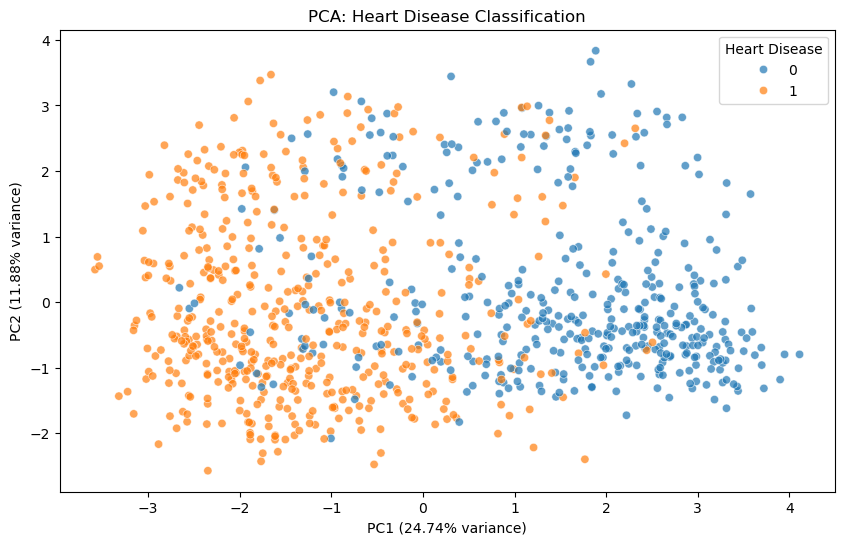

Explained variance ratio: [0.24738701 0.11875412]
Total explained variance: 0.3661411336714397


In [75]:
# Add these cells to your notebook:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Prepare features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Convert boolean columns to int
X = X.astype(int)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['HeartDisease'] = y.values

# Visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='HeartDisease', alpha=0.7)
plt.title('PCA: Heart Disease Classification')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(title='Heart Disease')
plt.show()

# Print explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

Accuracy with all features: 0.8571428571428571
Accuracy with 2 PCA components: 0.8131868131868132

Classification Report with PCA:
              precision    recall  f1-score   support

           0       0.73      0.85      0.78        72
           1       0.89      0.79      0.84       110

    accuracy                           0.81       182
   macro avg       0.81      0.82      0.81       182
weighted avg       0.82      0.81      0.81       182



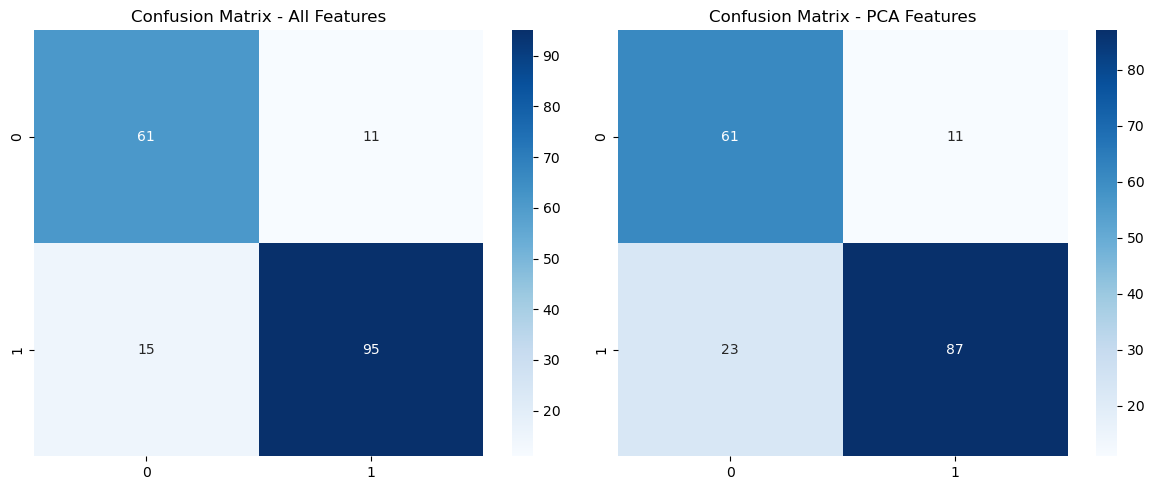

In [76]:
# Compare models with and without PCA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model with all features
clf_full = RandomForestClassifier(random_state=42)
clf_full.fit(X_train, y_train)
y_pred_full = clf_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# Model with PCA features
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = clf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)

print("Accuracy with all features:", acc_full)
print("Accuracy with 2 PCA components:", acc_pca)
print("\nClassification Report with PCA:")
print(classification_report(y_test_pca, y_pred_pca))

# Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_full = confusion_matrix(y_test, y_pred_full)
sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - All Features')

plt.subplot(1, 2, 2)
cm_pca = confusion_matrix(y_test_pca, y_pred_pca)
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - PCA Features')

plt.tight_layout()
plt.show()

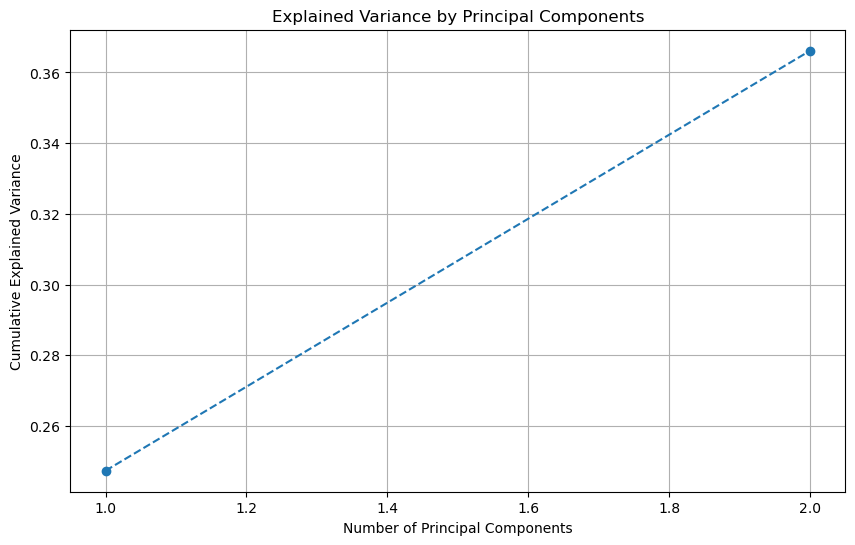

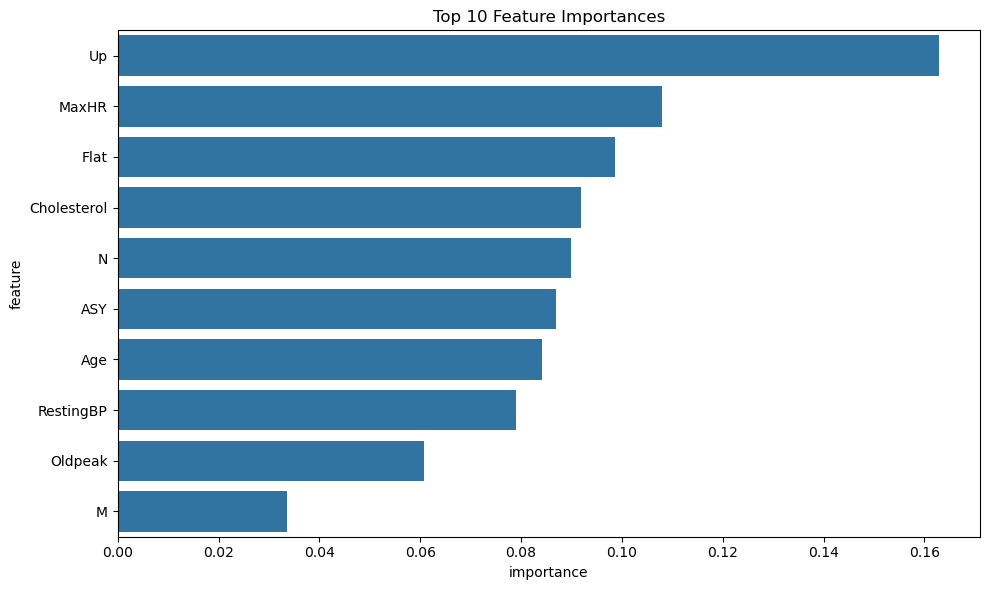

In [77]:
# PCA Variance Explained Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Feature Importance (if using tree-based models)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': clf_full.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

<h1>***PC1 & PC2 ANALYSIS***</h1>

### What we're doing here:
1. **Preparing features**: Using our cleaned dataset (after one-hot encoding and outlier removal)
2. **Standardization**: Scaling features to have zero mean and unit variance (crucial for PCA)
3. **PCA Transformation**: Converting 15+ features into just 2 principal components
4. **Extracting PC1 & PC2**: The first two components that capture the most variance


In [78]:
# Prepare the features (using your preprocessed dataframe)
X = df.drop('HeartDisease', axis=1)

# Convert boolean columns to int for PCA
X = X.astype(int)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Extract PC1 and PC2
PC1 = X_pca[:, 0]  # First principal component
PC2 = X_pca[:, 1]  # Second principal component

# Create a DataFrame with PC1 and PC2
pca_df = pd.DataFrame({
    'PC1': PC1,
    'PC2': PC2,
    'HeartDisease': df['HeartDisease'].values
})

print("📊 PCA Components Extracted!")
print(f"PC1 explains: {pca.explained_variance_ratio_[0]:.2%} variance")
print(f"PC2 explains: {pca.explained_variance_ratio_[1]:.2%} variance")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")

📊 PCA Components Extracted!
PC1 explains: 24.74% variance
PC2 explains: 11.88% variance
Total variance explained: 36.61%


### What are "Loadings"?
PCA loadings represent how much each original feature contributes to each principal component. They tell us:

- **High positive loading**: Feature strongly influences the component in positive direction
- **High negative loading**: Feature strongly influences the component in negative direction  
- **Near zero loading**: Feature has little influence on that component

In [79]:
# 📈 Display PC1 and PC2 Details
print("🔍 PCA LOADINGS (Feature Contributions)")
print("="*50)

# Get feature names (from your preprocessed dataframe)
feature_names = X.columns.tolist()

# Create a DataFrame to show loadings
loadings_df = pd.DataFrame({
    'Feature': feature_names,
    'PC1_Loading': pca.components_[0],
    'PC2_Loading': pca.components_[1]
})

# Sort by absolute PC1 loading to see most important features
loadings_df['PC1_Abs'] = abs(loadings_df['PC1_Loading'])
loadings_df = loadings_df.sort_values('PC1_Abs', ascending=False)

print(loadings_df.round(4))

🔍 PCA LOADINGS (Feature Contributions)
        Feature  PC1_Loading  PC2_Loading  PC1_Abs
12           Up       0.4149       0.0058   0.4149
11         Flat      -0.3714      -0.0129   0.3714
6           ASY      -0.3533      -0.1273   0.3533
13            N       0.3519       0.0383   0.3519
4         MaxHR       0.3242       0.1441   0.3242
7           ATA       0.2963      -0.0535   0.2963
5       Oldpeak      -0.2838       0.0822   0.2838
0           Age      -0.2503       0.2133   0.2503
14            M      -0.1682      -0.1519   0.1682
3     FastingBS      -0.1422      -0.0500   0.1422
8           NAP       0.1318       0.1594   0.1318
1     RestingBP      -0.1240       0.2028   0.1240
2   Cholesterol       0.1122       0.2844   0.1122
10       Normal       0.1015      -0.5854   0.1015
9           LVH      -0.0332       0.6250   0.0332


### Interpreting the results:
- Features with highest absolute loadings on **PC1** are the most important for capturing variance
- **PC1** typically captures the most overall patterns in the data
- **PC2** captures the next most important patterns (orthogonal to PC1)

C:\Users\krish\AppData\Local\Temp\ipykernel_36448\3460157265.py:31: UserWarning: Glyph 129728 (\N{ANATOMICAL HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\krish\AppData\Local\Temp\ipykernel_36448\3460157265.py:31: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\krish\Downloads\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129728 (\N{ANATOMICAL HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\krish\Downloads\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


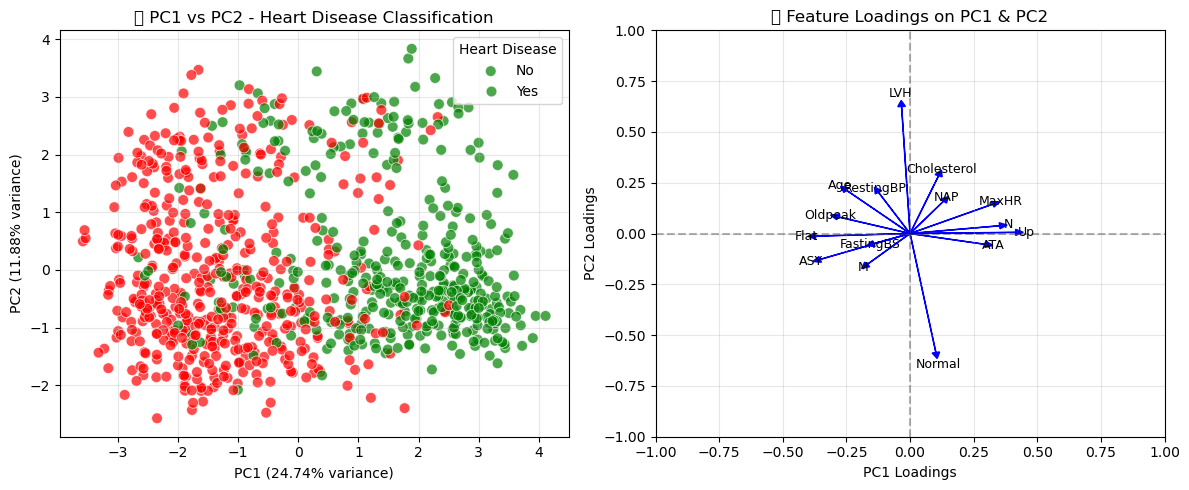

In [87]:
plt.figure(figsize=(12, 5))

# Plot 1: PC1 vs PC2 colored by Heart Disease
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='HeartDisease', 
                palette={0: 'green', 1: 'red'}, alpha=0.7, s=60)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('🫀 PC1 vs PC2 - Heart Disease Classification')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.grid(True, alpha=0.3)

# Plot 2: Feature loadings (biplot)
plt.subplot(1, 2, 2)
# Plot feature vectors
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
              head_width=0.03, head_length=0.03, fc='blue', ec='blue')
    plt.text(pca.components_[0, i] * 1.1, pca.components_[1, i] * 1.1, 
             feature, fontsize=9, ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.title('📈 Feature Loadings on PC1 & PC2')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [81]:
# 📊 PC1 and PC2 Statistics
print("📈 PC1 & PC2 STATISTICS")
print("="*30)

pc1_stats = pca_df['PC1'].describe()
pc2_stats = pca_df['PC2'].describe()

stats_df = pd.DataFrame({
    'PC1': pc1_stats,
    'PC2': pc2_stats
})

print(stats_df.round(4))

print(f"\n🔗 Correlation between PC1 and PC2: {pca_df['PC1'].corr(pca_df['PC2']):.4f}")

📈 PC1 & PC2 STATISTICS
            PC1       PC2
count  906.0000  906.0000
mean     0.0000    0.0000
std      1.9274    1.3354
min     -3.5784   -2.5727
25%     -1.6849   -0.9614
50%     -0.3130   -0.3672
75%      1.6964    0.7238
max      4.1100    3.8340

🔗 Correlation between PC1 and PC2: -0.0000


In [84]:
# 🏆 Top Features for Each Component
print("🏆 TOP FEATURES CONTRIBUTING TO PC1")
print("="*40)
top_pc1 = loadings_df.nlargest(5, 'PC1_Abs')[['Feature', 'PC1_Loading']]
print(top_pc1.round(4))

print(f"\n🏆 TOP FEATURES CONTRIBUTING TO PC2")
print("="*40)
loadings_df['PC2_Abs'] = abs(loadings_df['PC2_Loading'])
top_pc2 = loadings_df.nlargest(5, 'PC2_Abs')[['Feature', 'PC2_Loading']]
print(top_pc2.round(4))

🏆 TOP FEATURES CONTRIBUTING TO PC1
   Feature  PC1_Loading
12      Up       0.4149
11    Flat      -0.3714
6      ASY      -0.3533
13       N       0.3519
4    MaxHR       0.3242

🏆 TOP FEATURES CONTRIBUTING TO PC2
        Feature  PC2_Loading
9           LVH       0.6250
10       Normal      -0.5854
2   Cholesterol       0.2844
0           Age       0.2133
1     RestingBP       0.2028
